# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [2]:
dfm = pd.read_csv("./data/movies.csv")
dfr = pd.read_csv("./data/ratings.csv")
dfl = pd.read_csv("./data/links.csv")
dft = pd.read_csv("./data/tags.csv")


In [ ]:
dfm

In [ ]:
dfr

In [ ]:
dfl

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [3]:
dfr["movieId"].nunique(), dfr["userId"].nunique() 

(9724, 610)

#### What is the average rating

In [4]:
dfm_avr = dfr["rating"].mean().round(2)
dfm_avr

3.5

#### which rating appears the most?

In [5]:
df_5 = dfr["rating"].mode()
df_5

0    4.0
Name: rating, dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [6]:
df_5 = dfr[dfr["rating"] == 5]
rate5_per = len(df_5)/len(dfr["rating"])*100
rate5_per

13.101471696616288

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [7]:
df_raters = dfr.groupby("userId")[["rating"]].count()
df_raters = df_raters.reset_index()
df_raters 

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


- How many users have rated more than 20 movies?

In [8]:
df_raters_20 = df_raters[df_raters > 20].value_counts()
print(len(df_raters_20))

576


- How many movies rated the user with the most/ least ratings?

-  What is the *median* number of ratings?

In [9]:
dfr["rating"].median()

3.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

<Axes: xlabel='rating', ylabel='Count'>

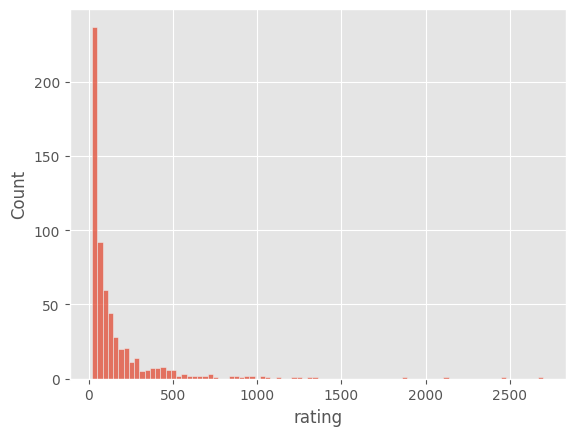

In [45]:

sns.histplot(data=df_raters, x= "rating")


---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [12]:
user_rate_avg = dfr.groupby("userId")[["rating"]].mean()
user_rate_avg

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


- Which user gave the worst ratings on average, which user gave the best ratings?

In [13]:
user_rate_avg.max(), user_rate_avg.idxmax()


(rating    5.0
 dtype: float64,
 rating    53
 dtype: int64)

In [14]:
user_rate_avg.min(), user_rate_avg.idxmin()


(rating    1.275
 dtype: float64,
 rating    442
 dtype: int64)

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

- Plot the distribution of average ratings! How would you characterize the distribution?

<Axes: ylabel='Count'>

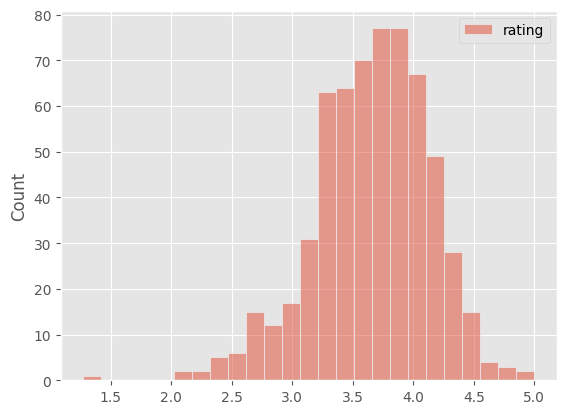

In [15]:
sns.histplot(user_rate_avg)


- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [17]:
dfm.shape

(9742, 3)

In [16]:
# There are 5 dublicates in the movie table.
dfm["title"].duplicated().value_counts()


title
False    9737
True        5
Name: count, dtype: int64

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [18]:
# 18 movie does not exist in the ratings table.
dfm.movieId.isin(dfr.movieId).astype(int).value_counts()


movieId
1    9724
0      18
Name: count, dtype: int64

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [19]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
df = dfr.merge(dfm, how='left', on=['movieId'])
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


---
#### Count the number of ratings per movie title!

In [22]:
rate_per_movie = df.groupby("title")[["rating"]].count()
rate_per_movie

,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5


- What are the top 10 most rated movies in the dataset?

In [23]:
rate_per_movie["rating"].nlargest(n=10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [24]:
# Why I cannot create a column directly here
coef_var = df.groupby("title")["rating"].std()/df.groupby("title")["rating"].mean()
coef_var

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                       0.000000
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                    0.353553
                                               ...   
eXistenZ (1999)                              0.208218
xXx (2002)                                   0.348851
xXx: State of the Union (2005)               0.250000
¡Three Amigos! (1986)                        0.301156
À nous la liberté (Freedom for Us) (1931)         NaN
Name: rating, Length: 9719, dtype: float64

In [25]:
df['coef_var'] = df['title'].map(coef_var)
df

,userId,movieId,rating,timestamp,title,genres,coef_var
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.212924
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,0.323603
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,0.207098
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.232036
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.188997
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,0.471169
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,0.180555
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,0.267587
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,0.151118


---

#### Calculate the average rating per movie title!

In [26]:
movie_rate_avr = df.groupby("title")[["rating"]].mean()
movie_rate_avr.head(2)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0


- Make a visualization of the distribution of average ratings per movie

In [27]:
movie_rate_avr = movie_rate_avr.reset_index()
movie_rate_avr

,title,rating
0,'71 (2014),4.000000
1,'Hellboy': The Seeds of Creation (2004),4.000000
2,'Round Midnight (1986),3.500000
3,'Salem's Lot (2004),5.000000
4,'Til There Was You (1997),4.000000
...,...,...
9714,eXistenZ (1999),3.863636
9715,xXx (2002),2.770833
9716,xXx: State of the Union (2005),2.000000
9717,¡Three Amigos! (1986),3.134615


In [28]:
movie_rate_avr.columns

Index(['title', 'rating'], dtype='object')

<Axes: ylabel='Count'>

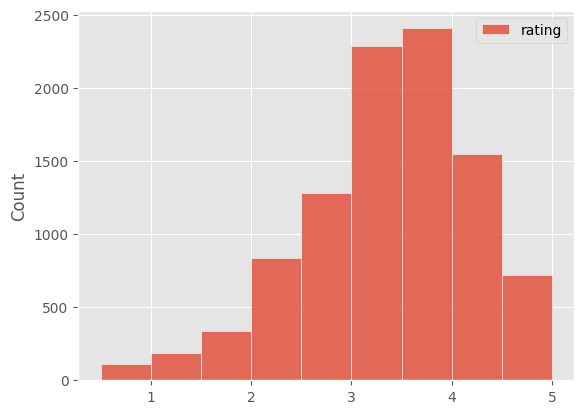

In [44]:
# How I can make it per movie?
sns.histplot(movie_rate_avr, binwidth=.5, alpha = 0.8)

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [50]:
df_ntitles = df.groupby("title")[["rating"]].count()
df_ntitles = df_ntitles.rename(columns={'rating': 'nrating'})
df_ntitles.reset_index()

,title,nrating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [47]:
best_movie = movie_rate_avr.sort_values(by="rating", ascending=False)
best_movie.head(2)

,title,rating
3354,Gena the Crocodile (1969),5.0
8951,True Stories (1986),5.0


In [56]:
df_merge = df_ntitles.merge(best_movie, how="left", on= "title")
df_best = df_merge[df_merge["nrating"]>30].sort_values(by = "rating", ascending=False)
df_best.head()

,title,nrating,rating
7593,"Shawshank Redemption, The (1994)",317,4.429022
4972,Lawrence of Arabia (1962),45,4.300000
3499,"Godfather, The (1972)",192,4.289062
3011,Fight Club (1999),218,4.272936
1961,Cool Hand Luke (1967),57,4.271930


- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!